##Final Project

###Analyzing Courses Offered on Udemy

Data: This data was taken from [Kaggle]('https://www.kaggle.com/andrewmvd/udemy-courses'). 

![0*ck19RC019ErjyQ7i](https://user-images.githubusercontent.com/55968160/91507702-4771e980-e88a-11ea-9bb3-bcf6ee176c9c.png)

This dataset contains 3,682 records of courses from 4 subjects (Business Finance, Graphic Design, Musical Instruments and Web Design) taken from Udemy.

Udemy is a massive online open course (MOOC) platform that offers both free and paid courses. Anybody can create a course, a business model by which allowed Udemy to have hundreds of thousands of courses.

Aim: To analyze the user response for the courses offered on Udemy and provide actionable insights.

**Table Of Content:**

- **Paid vs Free Courses**

- **Relation between Reviews and Paid/Free Courses**

- **Countplot for Different Courses**

- **Top 5 Web Development Courses**

- **Relation between Price and Difficulty Level**

- **Hypothesis: Duration against Content Duration**

- **Conclusion**

- **Future Research Proposal**

**Process Flow:** 

Exploratory Data Analysis ->
Data Visualization ->
Data Wrangling -> Reports.



**_Special thanks to Fred and Kihoon for guiding me throughout the course._**


In [1]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

In [2]:
#Reading Data from Git
url = 'https://raw.githubusercontent.com/sajithgowthaman/Recipe-GA/master/udemy_courses.csv'
df = pd.read_csv(url)

In [3]:
#EDA Begins!
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
print(df.shape)
print (f'\n There are {df.shape[0]} rows and {df.shape[1]} columns.')

(3678, 12)

 There are 3678 rows and 12 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [6]:
#Considering only numerical columns that makes sense.
df[1::].describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.677000e+03,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000
mean,6.758645e+05,66.013054,3197.436225,156.295349,40.105793,4.095223
std,3.432580e+05,60.974029,9505.393863,935.576691,50.389878,6.054513
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076580e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.877420e+05,45.000000,911.000000,18.000000,25.000000,2.000000
75%,9.608980e+05,95.000000,2547.000000,67.000000,45.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [7]:
#Drop columns that are not required
df.drop(columns =['url','published_timestamp', 'course_id' ], inplace= True)

#Change True to Paid and False to Unpaid
df.is_paid = df.is_paid.astype(str)
df.is_paid = df.is_paid.replace('True','Paid').replace('False','Free')


The number of paid courses are: 3368 out of 3678 which is 91.57 % of the total sample.



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


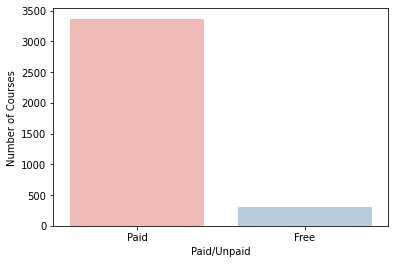

In [8]:
#Plotting the number of courses
print('')
print('The number of paid courses are:', df.is_paid.value_counts()[0],'out of',len(df.is_paid),'which is',np.round((df.is_paid.value_counts()[0]/len(df.is_paid))*100,decimals=2),'% of the total sample.')
print('')
sns.countplot(df.is_paid,palette='Pastel1')
plt.xlabel('Paid/Unpaid')
plt.ylabel('Number of Courses');

**We have about 3368 paid courses and 310 free courses.**

**The data is skewed in terms of paid or unpaid courses. Well, most courses ARE paid in Udemy.**

The mean number subscribers for paid courses were: 2429.81

The mean number of subscribers for free courses were: 11533.95
There were more subscribers on average for courses that were offered free than the paid courses. 



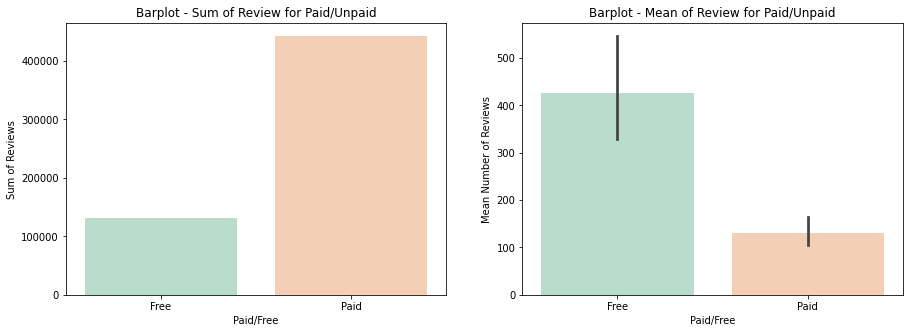

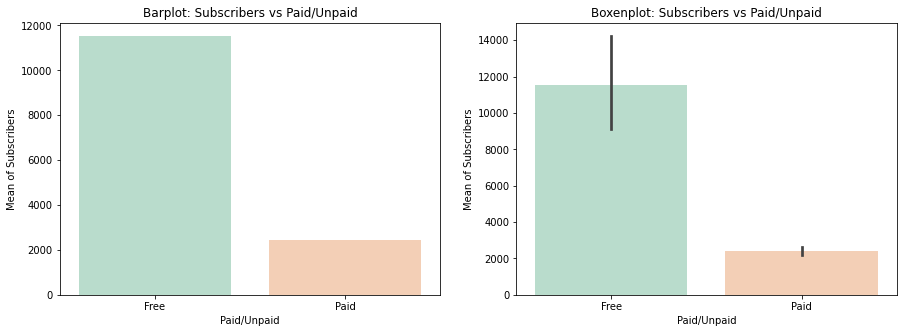

In [9]:
#Reviews for Paid vs Unpaid
fig, axes = plt.subplots(1,2, figsize=(15,5))

#Let's check the number of reviews for paid and unpaid courses.
df_count = df.groupby(by=['is_paid'])['num_reviews'].sum().reset_index()
df_count.sort_values('num_reviews', ascending=False, inplace=True)
df_count = pd.DataFrame(df_count)
df_count.head()

#Plot for price and number of reviews
order_pf = ['Free', 'Paid']
ax = sns.barplot(x="is_paid", y="num_reviews", palette= 'Pastel2', data=df_count, order = order_pf, ax = axes[0]);
ax.set(xlabel='Paid/Free', ylabel= 'Sum of Reviews', title = 'Barplot - Sum of Review for Paid/Unpaid');


ax = sns.barplot(x="is_paid", y="num_reviews", palette= 'Pastel2', data=df, order = order_pf, ax = axes[1]);
ax.set(xlabel='Paid/Free', ylabel= 'Mean Number of Reviews', title = 'Barplot - Mean of Review for Paid/Unpaid');

#Interesting - Free courses have more subscribers
fig, axes = plt.subplots(1,2, figsize=(15,5))

#plot2 - groupby is_paid
df_sub = df.groupby(by=['is_paid'])['num_subscribers'].mean().reset_index()
df_sub.sort_values('num_subscribers', ascending=False, inplace=True)
df_sub = pd.DataFrame(df_sub)

#Barplot for Sub vs Paid/Unpaid
ax = sns.barplot(x=df_sub["is_paid"], y=df_sub["num_subscribers"], palette= 'Pastel2', ax=axes[0]);
ax.set(xlabel= 'Paid/Unpaid', 
       ylabel= 'Mean of Subscribers',
       title = 'Barplot: Subscribers vs Paid/Unpaid')

#Get rid off the scientific notation for simplicity
plt.ticklabel_format(style='plain', axis='y')

print (f'The mean number subscribers for paid courses were: {np.round(df_sub["num_subscribers"][1],decimals=2)}\n')
print (f'The mean number of subscribers for free courses were: {np.round(df_sub["num_subscribers"][0],decimals=2)}')


#Boxenplot for paid vs unpaid
orders = ['Free', 'Paid']
ax1 = sns.barplot(x=df["is_paid"], y=df["num_subscribers"], palette = 'Pastel2', order = orders, ax =axes[1]);
ax1.set(xlabel= 'Paid/Unpaid',
        ylabel= 'Mean of Subscribers',
        title = 'Boxenplot: Subscribers vs Paid/Unpaid')


print('There were more subscribers on average for courses that were offered free than the paid courses. \n')

- **In total Paid courses had more reviews than free courses.**

- **However, on average, Free courses had more reviews and subscribers than paid.** 

- **This is largely due to the fact that the data consists of 91% of paid courses, which eventually leads to the large spurious sum.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


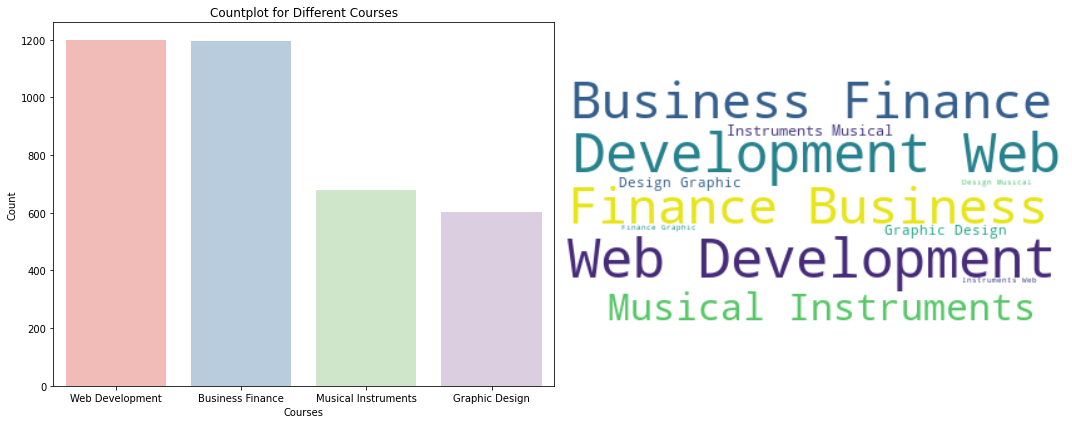

In [10]:
#Countplot for Different Courses
fig, axes = plt.subplots(1,2, figsize=(15,6))

ax=axes[0]
orders = ['Web Development', 'Business Finance', 'Musical Instruments', 'Graphic Design']
ax2 = sns.countplot(df.subject, palette='Pastel1', order= orders, ax=axes[0], )
ax2.set(
    xlabel="Courses",
    ylabel="Count",
    title="Countplot for Different Courses")

# Generate a word cloud image
wc = WordCloud(background_color="white").generate(" ".join(df["subject"]))
# Display the generated image:
axes[1].imshow(wc, interpolation='bilinear', )
axes[1].axis("off")
plt.tight_layout()
plt.show()
plt.close()

**Web Developments had the most number of courses in the data, followed by Business Finance**

Nothing interesting here, I knew Web Development courses would be the most offered course. For one: I come from a Mechanical Engineering/Industrial Engineering background and I dont remember using Udemy for learning them at all. I only used Udemy to learn courses related to web devp.

**It is interesting to see more Musical Instrument courses than Graphic Design.**

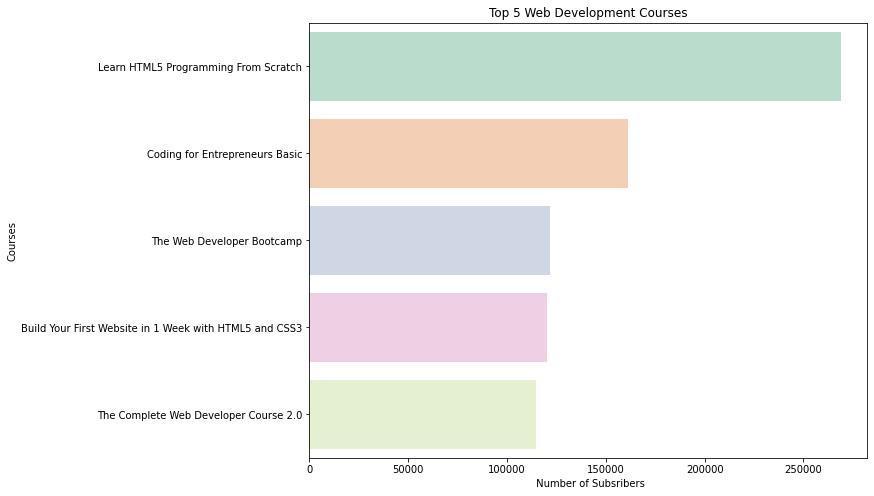

In [11]:
#Top 5 Web Development courses:

#Sort
df_top5_web_courses = df.sort_values(by = ['num_subscribers'], ascending=False)

#Grab the course_title and num_subscribers
top_course = df_top5_web_courses.loc[df_top5_web_courses['subject'] == 'Web Development', 'course_title']
top_course_rating = df_top5_web_courses.loc[df_top5_web_courses['subject'] == 'Web Development', 'num_subscribers']

#Create a dataframe
df_top_course = pd.DataFrame(top_course)
df_top_course_sub = pd.DataFrame(top_course_rating)

#Performing a merge on the two dataframes
df_top_course = df_top_course.merge(df_top_course_sub, left_index=True, right_index=True)
df_top_course.reset_index(inplace=True)
df_top_course.drop(columns=['index'],inplace = True)

#Visualize the top 5 Courses using Seaborn
plt.figure(figsize=(10,8))

top_five= df_top_course.nlargest(5,'num_subscribers')
ax = sns.barplot(x="num_subscribers",y='course_title', data=top_five, palette= 'Pastel2');
ax.set(xlabel= ' Number of Subsribers', ylabel= 'Courses', title = 'Top 5 Web Development Courses');

**In order to find the top 5 Web Development courses, the data had to be wrangled and mapped in a way that it provides the desired output.**

- Most courses were related to HTML5 and it had over 250,000 subscribers.

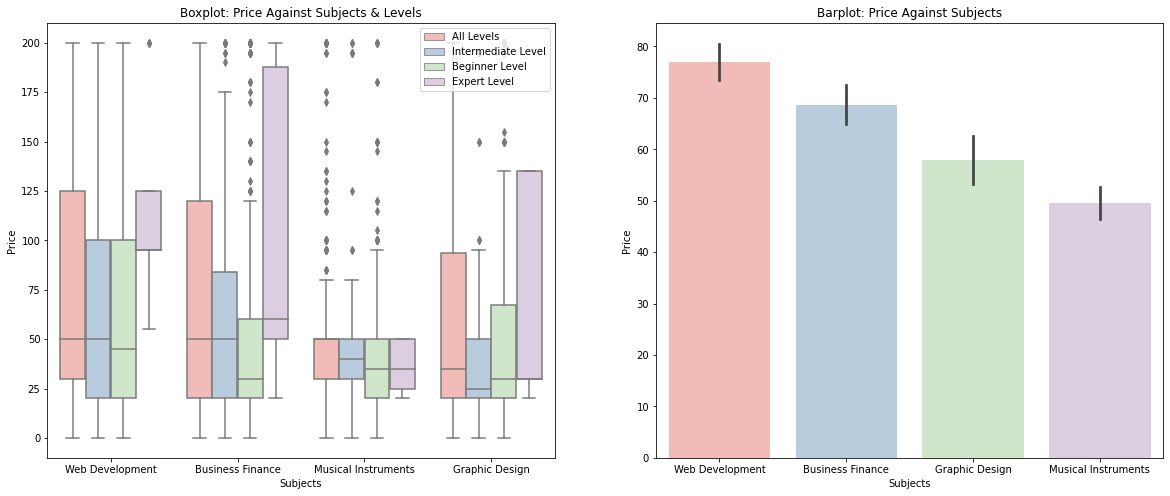

In [12]:
#Courses vs Price

#Let's find the most expensive courses and their levels
fig, axes = plt.subplots(1,2, figsize=(20,8))

#Boxplot for Price vs Subjects and Levels
ax = sns.boxplot(x=df.subject, y=df.price, palette='Pastel1', order= orders, hue=df.level, ax= axes[0])
ax.set(
    xlabel="Subjects",
    ylabel="Price",
    title="Boxplot: Price Against Subjects & Levels");
ax.legend(loc='upper right');

#Barplot for Price vs Subjects and Levels
orders = ['Web Development', 'Business Finance', 'Graphic Design','Musical Instruments']
ax1 = sns.barplot(x=df.subject, y=df.price, palette='Pastel1', order= orders, ax = axes[1]);
ax1.set(
    xlabel="Subjects",
    ylabel="Price",
    title="Barplot: Price Against Subjects");

**The price for web development were on average more expensive than the others. It is largely due to the fact that Web Development courses were top rated compared to the rest of the courses.**

**Expert Level courses were on average more expensive than the rest of the courses, followed by "All Levels".**

- There is not much difference between Intermediate and Beginner Level courses.

In [13]:
#Content Duration
#Avg price for content_duration from 0 to 40 hours and 40 to 80 hours
df_0_to_40_hours = df[df['content_duration'] <= 40.0]
df_40_to_80_hours = df[df['content_duration'] >= 40.0]

print(f'The average price for courses with 0 to 40 hours of content is: {np.round(df_0_to_40_hours.price.mean(), decimals=2)} hours.\n')
print(f'The average price for courses with 40 to 80 hours of content is: {np.round(df_40_to_80_hours.price.mean(), decimals=2)} hours.')

The average price for courses with 0 to 40 hours of content is: 65.56 hours.

The average price for courses with 40 to 80 hours of content is: 151.9 hours.


### Hypothesis:
**Hypothesis (Ho): As the content duration increases, the difficulty of the course increases.** 

We are going to test a hypothesis to see if the difficulty level increases with increase in duration. Usually the courses with longer duration are said to be more difficult to complete. Let's try it out by plotting.

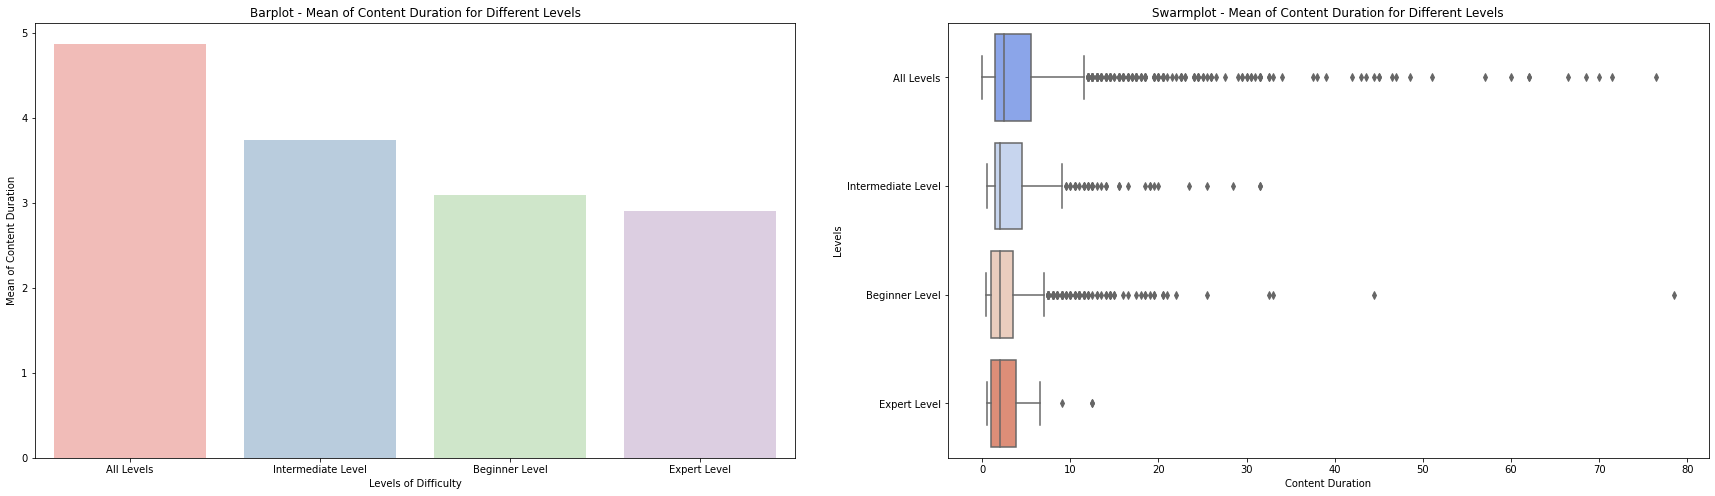

In [14]:
#Expert Level Courses have more duration
fig, axes = plt.subplots(1,2, figsize=(30,8))

#Groupby Data
df_dur1 = df.copy()
df_dur1 = df_dur1.groupby(by = 'level')['content_duration'].mean().reset_index()
df_dur1.sort_values('content_duration', ascending=False, inplace=True)

#Barplot for Duration vs Levels
ax = sns.barplot(x=df_dur1["level"], y=df_dur1["content_duration"], palette= 'Pastel1', ax = axes[0]);
ax.set(ylabel='Mean of Content Duration', 
       xlabel= 'Levels of Difficulty', 
       title= "Barplot - Mean of Content Duration for Different Levels");

#Swarmplot for Duration vs Levels
ax1 = sns.boxplot(x=df["content_duration"], y=df["level"], palette='coolwarm', ax = axes[1]);
ax1.set(ylabel='Levels',
        xlabel= 'Content Duration',
        title= "Swarmplot - Mean of Content Duration for Different Levels");

**Hypothesis failed, infact Expert Level had the least amount duration. The level of difficulty does not mean the course must be lengthy.**

We could get the exact amount of on average how much the duration differs based on duration by initiating a T-test and acquiring the P-value.

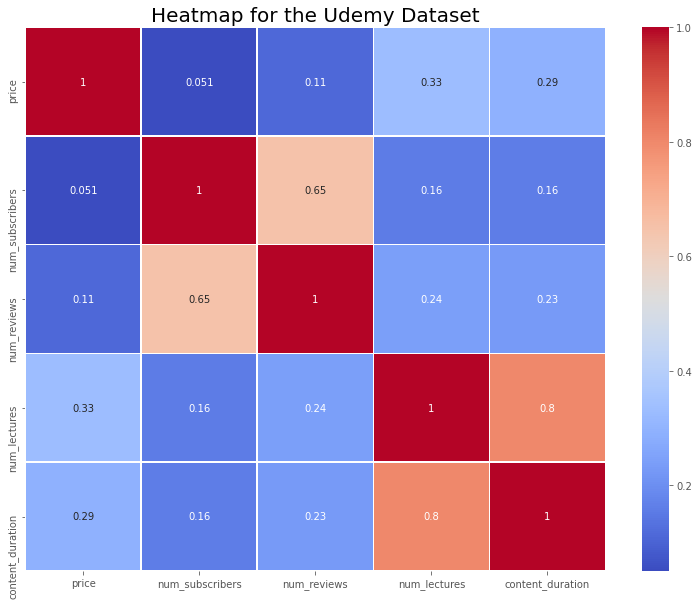

In [15]:
plt.rcParams['figure.figsize'] = (13, 10)
plt.style.use('ggplot')

sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linewidths=0.5)
plt.title('Heatmap for the Udemy Dataset', fontsize = 20);

Let's check what drives the courses to be paid or unpaid with the help of a pairplot.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


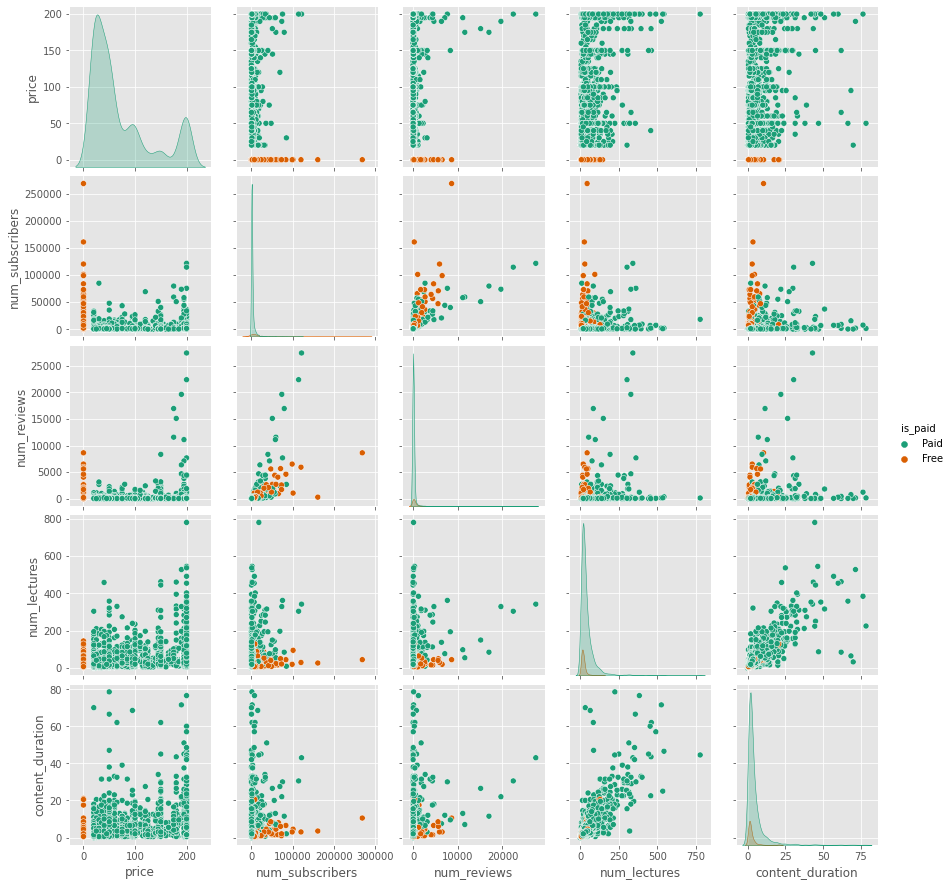

In [16]:
#Pairplots - correlation for paid/unpaid courses.
sns.pairplot(df,hue='is_paid',palette='Dark2');

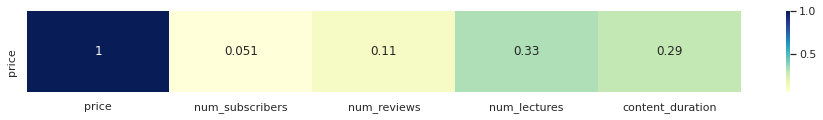

In [17]:
# Correlation with only target variables
sns.set(rc={'figure.figsize':(16,1.5)})
sns.heatmap(pd.DataFrame(pd.DataFrame(df.corr()).price).T,annot=True, cmap='YlGnBu');

**We could see that most of the free courses were found to be at the bottom left of the graph.**

**We can see that as the number of reviews, subscribers, lectures and content_duration increases, the courses are slowly converted to paid from being offered free.**

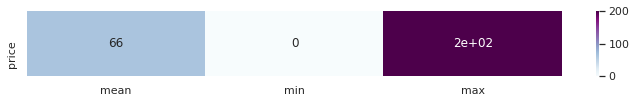

Distribution: 



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


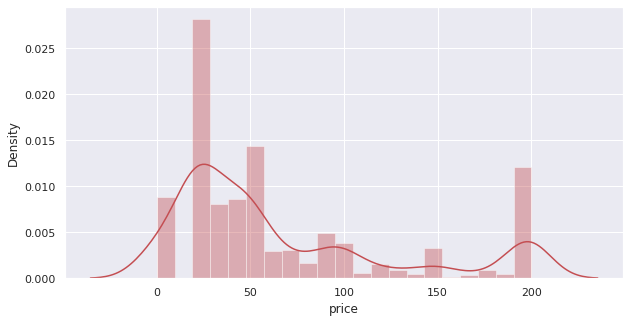

In [18]:
sns.set(rc={'figure.figsize':(12,1.2)})
sns.heatmap((pd.DataFrame(df.price.describe()).T)[['mean', 'min', 'max']], annot=True,  cmap='BuPu')
plt.show()

print('Distribution: \n')
sns.set(rc={'figure.figsize':(10,5)})
ax= sns.distplot(df.price, color='r');

###Recommender System:

Lets build recommender system that shows the top suggested courses based on users input. 

In [19]:
#Top 5 courses for all subjects:

#Grab the course_title and num_subscribers
Business_Finance = df[df['subject'] == 'Business Finance'].nlargest(5, 'num_subscribers')
Web_Development = df[df['subject'] == 'Web Development'].nlargest(5, 'num_subscribers')
Graphic_Design = df[df['subject'] == 'Graphic Design'].nlargest(5, 'num_subscribers')
Musical_Instruments = df[df['subject'] == 'Musical Instruments'].nlargest(5, 'num_subscribers')

What subject are you interested in?
Web Development
Here are the recommended courses for Web Development: 

The average price for Web Development is :$80.0


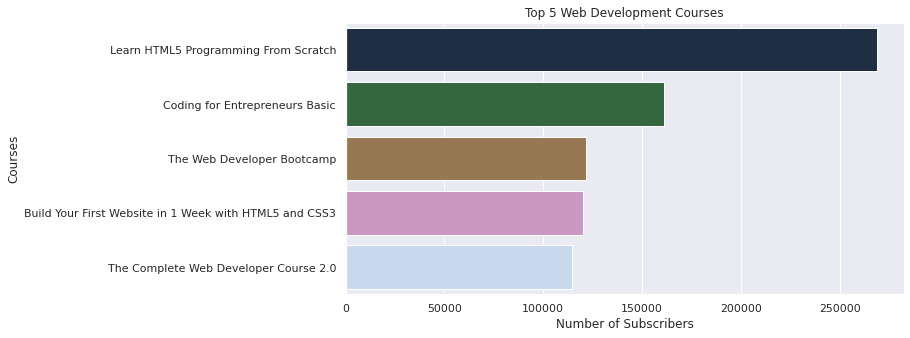

In [20]:
#Let's build a recommender system based on the users input

print('What subject are you interested in?')
while True:
#input
  user_input = input()
  if user_input in ['Web Development', 'Graphic Design', 'Musical Instruments', 'Business Finance']:
    user_inp = user_input.replace(' ', '_')
    print(f'Here are the recommended courses for {user_input}: \n' ) 
#convert the user input to our global variable
    user_inp = globals() [user_inp]
    print(f'The average price for {user_input} is :${user_inp["price"].mean()}', sep='')
    plt.figure(figsize=(10,5))
#Plots
    ax = sns.barplot(x="num_subscribers",y='course_title', data=user_inp, palette= 'cubehelix')
    ax.set(xlabel= 'Number of Subscribers', ylabel= 'Courses', title = f'Top 5 {user_input} Courses')
    
    break

  else:
    print('Please choose from one of the options below: \n')
    print(df.subject.unique(), '\n')

You could see that the system was able to produce the top 5 courses that were offered based on user's input .

###Key Takeaways:
The data has provided many actionable insights that could be of potential use for both students/Udemy/lecturers. 

- On average, courses that were offered without any cost had more reviews and subscribers than those that were paid.

- The highest number of courses were found to be Web Development.

- The average price of a course increases with increase in content duration.

- Expert level courses had lesser duration than the average.

###Future Research

- For the purpose of future research, if there is a feature that provides employment information after taking the class that would give us a better insights for what actualy courses are worth investing your time in. 

- We could build a price prediction model with more data points using Linear Regression ML model.


                                    Thank you!

Well the future is now LOL let's do it.

In [21]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics
from sklearn.cluster import DBSCAN

In [22]:
df.corr()

,price,num_subscribers,num_reviews,num_lectures,content_duration
price,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,0.293450,0.161839,0.228889,0.801647,1.000000


In [23]:
# Encoding features as numbers to be used with dimensionality reduction and clustering methods
order = OrdinalEncoder()

ordered_df = order.fit_transform(df)
ordered_df_as_df = pd.DataFrame(ordered_df, columns=df.columns)

In [24]:
ordered_df_as_df

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject
0,3406.0,1.0,37.0,1202.0,23.0,48.0,0.0,22.0,0.0
1,779.0,1.0,12.0,1374.0,410.0,194.0,0.0,86.0,0.0
2,1206.0,1.0,6.0,1209.0,74.0,48.0,3.0,24.0,0.0
3,444.0,1.0,16.0,1291.0,11.0,33.0,0.0,25.0,0.0
4,1580.0,1.0,37.0,852.0,45.0,23.0,3.0,23.0,0.0
...,...,...,...,...,...,...,...,...,...
3673,2271.0,1.0,17.0,710.0,14.0,18.0,0.0,23.0,3.0
3674,1568.0,1.0,2.0,276.0,3.0,39.0,1.0,26.0,3.0
3675,2251.0,1.0,5.0,418.0,165.0,45.0,0.0,26.0,3.0
3676,683.0,1.0,7.0,272.0,31.0,35.0,0.0,25.0,3.0


In [25]:
# Here we instantiate KMeans, using 4 clusters so as to build a recommending engine with about 30 books
kmeans_cluster = KMeans(n_clusters=5, random_state=123)

# Fit the model
y_pred = kmeans_cluster.fit_predict(
    ordered_df_as_df[
        [
            "price",
            "num_reviews",
            "num_lectures",
            "content_duration",
            "num_subscribers",
            "course_title",
            "subject",
            "level"
        ]
    ]
)


In [26]:
# Adding a new column with the cluster number
df['cluster'] = y_pred

In [27]:
# Searching up a sample book- one of my favorites, 'Financial Modeling'
df[df.course_title.str.contains('Financial Modeling')]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,cluster
2,Financial Modeling for Business Analysts and C...,Paid,45,2174,74,51,Intermediate Level,2.500000,Business Finance,2
38,Beginner to Pro in Excel: Financial Modeling a...,Paid,195,22257,2697,138,All Levels,7.500000,Business Finance,2
42,Financial Modeling for Startups & Small Busine...,Paid,195,4991,137,79,Beginner Level,11.500000,Business Finance,2
119,Introduction to Financial Modeling,Free,0,29167,1463,8,Intermediate Level,1.500000,Business Finance,0
140,Intro to Financial Modeling,Paid,105,1077,110,55,Beginner Level,6.000000,Business Finance,1
267,Financial Modeling: Build a Complete DCF Valua...,Paid,95,2240,185,44,All Levels,2.500000,Business Finance,2
268,Hands-on Financial Modeling (With 6 Excel Temp...,Paid,30,4601,38,14,Intermediate Level,4.000000,Business Finance,2
319,Analyze Real Estate Investments | Financial Mo...,Paid,20,120,18,21,All Levels,2.000000,Business Finance,3
566,Financial Modeling - Build Your Own 3 Statemen...,Paid,20,1092,48,13,Beginner Level,1.000000,Business Finance,3
806,Financial Modeling for Professionals in 1 Day!,Paid,200,226,12,29,Intermediate Level,4.500000,Business Finance,3


In [28]:
# Financial Modeling beginner to pro is contained in cluster 190. Let's take a look at the other courses contained in this cluster.
df[df.cluster == 0]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,cluster
0,Ultimate Investment Banking Course,Paid,200,2147,23,51,All Levels,1.5,Business Finance,0
5,Trading Penny Stocks: A Guide for All Levels I...,Paid,150,9221,138,25,All Levels,3.0,Business Finance,0
7,"Trading Stock Chart Patterns For Immediate, Ex...",Paid,95,2917,148,23,All Levels,2.5,Business Finance,0
8,Options Trading 3 : Advanced Stock Profit and ...,Paid,195,5172,34,38,Expert Level,2.5,Business Finance,0
15,Short Selling: Learn To Sell Stocks Before The...,Paid,75,2276,106,19,Intermediate Level,1.5,Business Finance,0
...,...,...,...,...,...,...,...,...,...,...
3612,Simple And Easy: Wordpress For Beginners,Free,0,5014,196,32,Beginner Level,3.0,Web Development,0
3658,The Complete Web Developer Course - Build 20 W...,Paid,20,2650,61,304,All Levels,15.5,Web Development,0
3659,"Simple Javascript: Learn by Doing, Beginners W...",Paid,25,2753,10,18,All Levels,2.0,Web Development,0
3660,"Learn HTML, CSS, and Ruby on Rails: Build Your...",Paid,20,2985,40,27,Beginner Level,1.5,Web Development,0


The results of this clustering are jumbled and really does not produce what we want as a recommender. 

In [29]:
# Searching up the 'Python' courses
df[df.course_title.str.contains('Python')]

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,cluster
14,Python Algo Trading: Sentiment Trading with News,Paid,200,294,19,42,All Levels,7.0,Business Finance,4
30,Python Algo Stock Trading: Automate Your Trading!,Paid,95,1165,21,41,Beginner Level,2.5,Business Finance,4
41,Python for Finance: Investment Fundamentals & ...,Paid,195,3811,278,103,All Levels,6.5,Business Finance,0
147,Python Algo Trading: FX Trading with Oanda,Paid,200,453,42,33,Intermediate Level,3.0,Business Finance,4
334,Stock Technical Analysis with Python,Paid,50,409,35,46,All Levels,8.0,Business Finance,4
536,Python for Trading & Investing,Paid,95,638,25,36,All Levels,5.0,Business Finance,4
762,Quantitative Trading Analysis with Python,Paid,50,256,17,49,All Levels,5.5,Business Finance,4
863,Investment Portfolio Analysis with Python,Paid,50,209,13,37,All Levels,7.0,Business Finance,1
1682,Learn to code in Python and learn Adobe Photos...,Paid,50,1132,1,29,All Levels,2.0,Graphic Design,1
2497,Web Programming with Python,Paid,50,35267,217,53,All Levels,4.0,Web Development,0


In [30]:
def recommendation(df, coursename):
    if coursename == "":
        return "course cannot be empty"
    if not df["course_title"].str.contains(coursename).any():
        return "Didn't find that course"
    cluster_to_find = df[df["course_title"].str.contains(coursename)].iloc[0]["cluster"]
    return df[df["cluster"] == cluster_to_find]

In [31]:
recommendation(df, 'Finance')

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,cluster
0,Ultimate Investment Banking Course,Paid,200,2147,23,51,All Levels,1.5,Business Finance,0
5,Trading Penny Stocks: A Guide for All Levels I...,Paid,150,9221,138,25,All Levels,3.0,Business Finance,0
7,"Trading Stock Chart Patterns For Immediate, Ex...",Paid,95,2917,148,23,All Levels,2.5,Business Finance,0
8,Options Trading 3 : Advanced Stock Profit and ...,Paid,195,5172,34,38,Expert Level,2.5,Business Finance,0
15,Short Selling: Learn To Sell Stocks Before The...,Paid,75,2276,106,19,Intermediate Level,1.5,Business Finance,0
...,...,...,...,...,...,...,...,...,...,...
3612,Simple And Easy: Wordpress For Beginners,Free,0,5014,196,32,Beginner Level,3.0,Web Development,0
3658,The Complete Web Developer Course - Build 20 W...,Paid,20,2650,61,304,All Levels,15.5,Web Development,0
3659,"Simple Javascript: Learn by Doing, Beginners W...",Paid,25,2753,10,18,All Levels,2.0,Web Development,0
3660,"Learn HTML, CSS, and Ruby on Rails: Build Your...",Paid,20,2985,40,27,Beginner Level,1.5,Web Development,0


We are able to get all the Business Finance in one single cluster, however there is a mixture of Web Development as well.

Let's try to build a content based recommender system, using netflix movie data.

In [32]:
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
df = pd.read_csv('https://query.data.world/s/uikepcpffyo2nhig52xxeevdialfl7')
df.head()

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings.Source,Ratings.Value,Metascore,imdbRating,imdbVotes,imdbID,Type,tomatoMeter,tomatoImage,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.3/10,80.0,9.3,"1,825,626",tt0111161,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,2,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.2/10,100.0,9.2,"1,243,444",tt0068646,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
2,3,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.0/10,85.0,9.0,"856,870",tt0071562,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True
3,4,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.0/10,82.0,9.0,"1,802,351",tt0468569,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
4,5,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,8.9/10,96.0,8.9,"494,215",tt0050083,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True


In [34]:
df = df[['Title','Genre','Director','Actors','Plot']]
df.head()

,Title,Genre,Director,Actors,Plot
0,The Shawshank Redemption,"Crime, Drama",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...
1,The Godfather,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...
2,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...
3,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...
4,12 Angry Men,"Crime, Drama",Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...


In [35]:
#Remove ',' from Names
df['Actors'] = df['Actors'].map(lambda x: x.split(',')[:4])

#Enter genres into a list
df['Genre'] = df['Genre'].map(lambda x: x.lower().split(','))

df['Director'] = df['Director'].map(lambda x: x.split(' '))

In [36]:
df.head()

,Title,Genre,Director,Actors,Plot
0,The Shawshank Redemption,"[crime, drama]","[Frank, Darabont]","[Tim Robbins, Morgan Freeman, Bob Gunton, W...",Two imprisoned men bond over a number of years...
1,The Godfather,"[crime, drama]","[Francis, Ford, Coppola]","[Marlon Brando, Al Pacino, James Caan, Rich...",The aging patriarch of an organized crime dyna...
2,The Godfather: Part II,"[crime, drama]","[Francis, Ford, Coppola]","[Al Pacino, Robert Duvall, Diane Keaton, Ro...",The early life and career of Vito Corleone in ...
3,The Dark Knight,"[action, crime, drama]","[Christopher, Nolan]","[Christian Bale, Heath Ledger, Aaron Eckhart...",When the menace known as the Joker emerges fro...
4,12 Angry Men,"[crime, drama]","[Sidney, Lumet]","[Martin Balsam, John Fiedler, Lee J. Cobb, ...",A jury holdout attempts to prevent a miscarria...


In [37]:
for index, row in df.iterrows():
  row['Actors'] = [x.lower().replace(' ','') for x in row['Actors']]
  row['Director'] = ''.join(row['Director']).lower()

In [38]:
#New col
df['key_words'] = ""

for index, row in df.iterrows():
  plot = row['Plot']

  #Instantiating Rake, using stop words from NLTK and discarding punctuations
  r = Rake() 

  #Extracting the words by passing by text
  r.extract_keywords_from_text(plot)

  #Getting the dictionary with key words and score
  key_words_dict_scores = r.get_word_degrees()

  #Assigning the key words to the new column
  row['key_words'] = list(key_words_dict_scores.keys())

#drop the plot column
df.drop(columns = ['Plot'], inplace = True)

In [39]:
df.set_index('Title', inplace = True)
df.head()

,Genre,Director,Actors,key_words
Title,,,,
The Shawshank Redemption,"[crime, drama]",frankdarabont,"[timrobbins, morganfreeman, bobgunton, william...","[eventual, redemption, common, decency, number..."
The Godfather,"[crime, drama]",francisfordcoppola,"[marlonbrando, alpacino, jamescaan, richards.c...","[reluctant, son, aging, patriarch, clandestine..."
The Godfather: Part II,"[crime, drama]",francisfordcoppola,"[alpacino, robertduvall, dianekeaton, robertde...","[tightens, portrayed, expands, grip, early, li..."
The Dark Knight,"[action, crime, drama]",christophernolan,"[christianbale, heathledger, aaroneckhart, mic...","[joker, emerges, greatest, psychological, wrea..."
12 Angry Men,"[crime, drama]",sidneylumet,"[martinbalsam, johnfiedler, leej.cobb, e.g.mar...","[prevent, evidence, miscarriage, forcing, jury..."


In [40]:
df['bag_of_words'] = ''
columns = df.columns
for index, row in df.iterrows():
  words = ''
  for col in columns:
    if col!= 'Director': 
      words = words + ' '.join(row[col])+ ' '
    else:
      words = words + row[col] + ' '
  row['bag_of_words'] = words

df.drop(columns = [col for col in df.columns if col!= 'bag_of_words'], inplace= True)

In [41]:
df.head()

,bag_of_words
Title,
The Shawshank Redemption,crime drama frankdarabont timrobbins morganfr...
The Godfather,crime drama francisfordcoppola marlonbrando a...
The Godfather: Part II,crime drama francisfordcoppola alpacino rober...
The Dark Knight,action crime drama christophernolan christia...
12 Angry Men,crime drama sidneylumet martinbalsam johnfied...


In [42]:
#Count Matrix Instantiating
count = CountVectorizer()
count_matrix = count.fit_transform(df['bag_of_words'])

#creating a series for the movie titles so they are associated to an ordered numerical
indices = pd.Series(df.index)
indices[:5]

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                12 Angry Men
Name: Title, dtype: object

In [43]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.14638501, 0.1315587 , ..., 0.05      , 0.05      ,
        0.05270463],
       [0.14638501, 1.        , 0.34236839, ..., 0.048795  , 0.048795  ,
        0.05143445],
       [0.1315587 , 0.34236839, 1.        , ..., 0.0438529 , 0.0438529 ,
        0.04622502],
       ...,
       [0.05      , 0.048795  , 0.0438529 , ..., 1.        , 0.05      ,
        0.05270463],
       [0.05      , 0.048795  , 0.0438529 , ..., 0.05      , 1.        ,
        0.05270463],
       [0.05270463, 0.05143445, 0.04622502, ..., 0.05270463, 0.05270463,
        1.        ]])

In [44]:
#Recommender Function
def recommendation(title, cosine_sim = cosine_sim):
  recommended_movies = []

  #getting the index of the movie the matches the title
  idx = indices[indices ==title].index[0]

  #creating a series with the similarity scores in descending order
  score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

  #getting the indexes of the 10 most similar movies
  top_10_indexes = list(score_series.iloc[1:11].index)

  #populating the list with the titles of the best 10 matching movies
  for i in top_10_indexes:
    recommended_movies.append(list(df.index)[i])
  return recommended_movies

code credit for content recommendation: satyajit maitra

In [45]:
recommendation('The Shawshank Redemption')

['Pulp Fiction',
 'Rope',
 'Se7en',
 'Goodfellas',
 'Butch Cassidy and the Sundance Kid',
 'The Godfather',
 'Papillon',
 'The Green Mile',
 'Casino',
 'Once Upon a Time in America']

In [46]:
#Basically it will return the movies that closely matches bag of words thats in the movies enterred. 